In [12]:
import numpy as np 
from SolveTriangular import *
A = np.array([[4.5,1,3,2],[1,-8,2,1], [-1,-2,-3,-1],[2,6,0,1]])
print(A)

[[ 4.5  1.   3.   2. ]
 [ 1.  -8.   2.   1. ]
 [-1.  -2.  -3.  -1. ]
 [ 2.   6.   0.   1. ]]


## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

In [5]:
import scipy as sp
PT,L,U=sp.linalg.lu(A)
P=PT.T
print(P)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
detA=np.linalg.det(P)*np.prod(np.diag(U))
print("Determinante di A ", detA)
print("Determinante con np.linalg.det(A) = ", np.linalg.det(A))

Determinante di A  58.00000000000001
Determinante con np.linalg.det(A) =  57.999999999999986


In [15]:
n=4
I=np.eye(n)
X=np.zeros_like(A)

In [16]:
#calcolo della matrice inversa
for i in range(n):
    b=I[:,i]
    y,flag= Lsolve(L,P@b)#permutazione del termine noto b
    if flag==0:
        x,flag=Usolve(U,y)
    X[:,i]=x.reshape(n,)

In [19]:
print(X)
print("Inversa con np.linalg.inv(A) \n ", np.linalg.inv(A))

[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]
Inversa con np.linalg.inv(A) 
  [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]


## Esercizio A1

Data La matrice 

$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$
dire se esiste la fattorizzaione LU senza pivotaggio a perno massimo, verificando le ipotesi del teorema di esistenza della fattorizzazione LU

In [21]:
A1= np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
n1=4
for i in range(1,n1):
    print(np.linalg.det(A[:i,:i]))

4.5
-37.0
97.0


In [22]:
A2=np.array([[21,37,57.5],[37,94,72.5],[57.5,72.5,186.25]])
print(A2)

[[ 21.    37.    57.5 ]
 [ 37.    94.    72.5 ]
 [ 57.5   72.5  186.25]]


In [24]:
n2=3
for i in range(1,n2+1):#se dico da 1 a n2 il range esclude l'ultima
    print(np.linalg.det(A2[:i,:i]))

21.0
604.9999999999997
-9.326929325488851e-12


## Esercizio B
- Implementare la function  per il calcolo del polinomio interpolatore di Lagrange

- Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,4$ sono punti equidistanti nell' intervallo [-2,2] e $y_i=f(x_i)$ dove $f(x)=5x^4+2x^2+2x-1$ 

- Visualizzare il polinomio interpolatore, i nodi dell'interpolazione

- Visualizzare l'errore assoluto tra il polinomio interpolatore e la funzione che ha generato i dati

- Commentare i risultati alla luce della teoria.


In [33]:
def plagr(xnodi,j):
    
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri==xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num= np.poly(xzeri)#coefficient
    den= np.polyval(num,xnodi[j])
    
    p=num/den 
    
    return p



def InterpL(x, y, xx):
     
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx) 
    
    
     return L@y  

In [34]:
import matplotlib.pyplot as plt
n=4
x=np.linspace(-2,2,n+1)
f=lambda x: 5*x**4+2*x**2+2*x-1
y=f(x)
xv=np.linspace(-2,2,100)
polL=InterpL(x,y,xv)
plt.plot(xv,polL,'r-',x,y,'bo',xv,f(xv),'g-')

ValueError: operands could not be broadcast together with shapes (5,) (4,) 

## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

In [38]:
xc = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
yc = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])
#costruire la matrice di vandermont 
nc=1
Ac1=np.vander(xc,increasing=True)[:,:nc+1]
print(Ac1)
condAc1=np.linalg.cond(Ac1)
print("condizionamento ", condAc1)

[[1.0000e+00 4.0000e-04]
 [1.0000e+00 2.5070e-01]
 [1.0000e+00 5.0080e-01]
 [1.0000e+00 2.0007e+00]
 [1.0000e+00 8.0013e+00]]
condizionamento  4.663457775986457


In [42]:
#il condizionamneto è basso quindi
def eqnorm(A,b):
 
    G= A.T@A
    f=A.T@b
    
    L=sp.linalg.cholesky(G,lower=True)
    U=L.T
    y,flag =Lsolve(L,f)
    if flag == 0:
        x,flag=Usolve(U,y)
    return x


[[1.00000000e+00 4.00000000e-04 1.60000000e-07]
 [1.00000000e+00 2.50700000e-01 6.28504900e-02]
 [1.00000000e+00 5.00800000e-01 2.50800640e-01]
 [1.00000000e+00 2.00070000e+00 4.00280049e+00]
 [1.00000000e+00 8.00130000e+00 6.40208017e+01]]
condizionamento  65.67493525624798
Matrice M  [[1.00000000e+00 9.99600080e-01 9.99200320e-01]
 [1.00000000e+00 7.78255813e-01 6.05682111e-01]
 [1.00000000e+00 6.06045629e-01 3.67291305e-01]
 [1.00000000e+00 1.35240582e-01 1.82900149e-02]
 [1.00000000e+00 3.35026810e-04 1.12242963e-07]]
condizionamento M  18.45808953019451


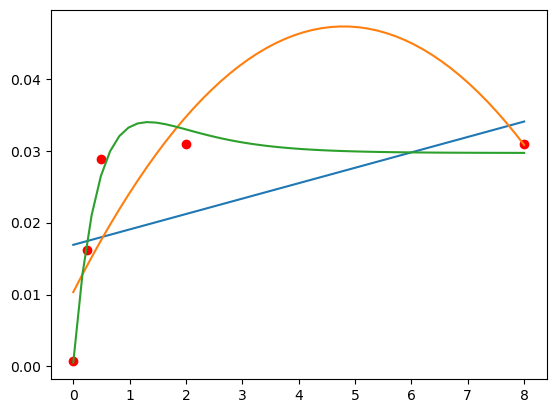

In [54]:
a1=eqnorm(Ac1,yc)
xvc=np.linspace(np.min(xc),np.max(xc))
pol1=np.polyval(np.flip(a1),xvc)

nc=2
Ac2=np.vander(xc,increasing=True)[:,:nc+1]
print(Ac2)
condAc2=np.linalg.cond(Ac2)
print("condizionamento ", condAc2)
a2=eqnorm(Ac2,yc)
pol2=np.polyval(np.flip(a2),xvc)

M=np.zeros((5,3))
M[:,0]=np.ones((5,))
M[:,1]=np.exp(-xc)
M[:,2]=np.exp(-2*xc)
print("Matrice M ",M)
condM=np.linalg.cond(M)
print("condizionamento M ",condM)
aexp=eqnorm(M,yc)
polexp=aexp[0]+aexp[1]*np.exp(-xvc)+aexp[2]*np.exp(-2*xvc)
plt.plot(xc,yc,'ro',xvc,pol1,xvc,pol2,xvc,polexp)

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]